In [ ]:
!pip install -Uqqq
!pip -qqq install bitsandbytes accelerate

!pip install sentencepiece sentence_transformers

ERROR: You must give at least one requirement to install (see "pip help install")
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 111.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 10.9 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl 

## Google Drive Mount

- 자신의 데이터 드라이브에 맞게 바꿔주세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/meme/data/
%ls


/content/drive/.shortcut-targets-by-id/1V8iy0OQc7tMBaxH6Gy07WctPoYUpohun/data
 crawlingData_jjalbang_net_0219.csv   crawlingData_움짤.csv     많이/
 CrawlingData_merged_2.csv            crawlingData_유재석.csv   머리/
 CrawlingData_merged_final.csv        crawlingData_윤석열.csv   명수/
 crawlingData_고백.csv                crawlingData_인사.csv     명수짤/
 crawlingData_공부.csv                crawlingData_자극.csv     모솔/
 CrawlingData_기타.csv                crawlingData_전쟁.csv     몸매/
 crawlingData_꺼져.csv                crawlingData_좋아.csv     무도/
 crawlingData_나는.csv                crawlingData_주식.csv     무도짤/
 crawlingData_나락.csv                crawlingData_주식짤.csv   무한도전/
 crawlingData_나이.csv                crawlingData_지하철.csv   문신/
 crawlingData_남자.csv                crawlingData_직장.csv     박명수/
 crawlingData_눈물.csv                crawlingData_직장인.csv   복/
 crawlingData_다이어트.csv       

## import

In [ ]:
import re
import csv
import json
import torch
import random
import numpy as np
import pandas as pd
import gradio as gr

from tqdm import tqdm
from transformers import AutoModelForCausalLM, AutoTokenizer, BartForConditionalGeneration
from sentence_transformers import SentenceTransformer, util

# Model 불러오기


## Text Summarization Model

In [ ]:
model_name = "alaggung/bart-r3f"

ts_model = BartForConditionalGeneration.from_pretrained(model_name)
ts_tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/187M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/559 [00:00<?, ?B/s]

## SOLAR (LLM model)

In [ ]:
device = 'auto' #param {type: "string"}
base_LLM_model = 'beomi/OPEN-SOLAR-KO-10.7B' #param {type: "string"}

###########################################
# 3-1. 모델 다운로드 (~30분)

llm_model = AutoModelForCausalLM.from_pretrained(
    base_LLM_model,
    #load_in_8bit=True, # LoRA
    load_in_4bit=True, # Quantization Load
    torch_dtype=torch.float16,
    device_map=device)

llm_tokenizer = AutoTokenizer.from_pretrained(base_LLM_model)

config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/3.00G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/2.97G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/1.05G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.1k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.59M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


## SBERT

In [ ]:
from sentence_transformers import SentenceTransformer, util

smodel = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/336k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/967k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Data preprocessing

- 데이터 전처리 코드입니다. 실행하실 필요 없습니다. (이미 실행됨)
- 그렇기에 데모에도 필요가 없습니다.



## gif 제거

In [ ]:
import pandas as pd

df = pd.read_csv('./test_vqa.csv')
df = df[df['Image URL'].apply(lambda x: isinstance(x, str) and 'gif' not in x)]
df = df.reset_index(drop=True)

## Unknown Tag들 정리

In [ ]:
strange_change_tag = {'잡솼어' : '잡수다', '잡솼솨' : '잡수다', '움짫' : np.nan, "뾲" : np.nan, '귖싸대기' : '귀싸대기', "따쓋" : np.nan,
                      '귕' : '귀여워', '스쾃' : '스쿼트', '나랑사귖' : '나랑 사귀자', '케쳡' : '캡처', '프로듓' : np.nan, 'ㅆㅂㄻ' : '욕',
                      '훡유' : '욕', '췰퇴근' : '출퇴근', '짲증' : '짜증'}

In [ ]:
for wrong, right in strange_change_tag.items():
  df.replace(wrong, right, inplace=True)

## 유사한 태그들 제거

In [ ]:
from sentence_transformers import SentenceTransformer, util

smodel = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

In [ ]:
delete_tag = []
change_tag = {}

tag_data = list(tag_data)
tag_tensor = smodel.encode(tag_data)
sim_list = util.cos_sim(tag_tensor, tag_tensor)

diag_size = sim_list.size(0)
high = (sim_list >= 0.8) & (~torch.eye(diag_size, dtype=torch.bool))

In [ ]:
sim_change_tag = {}
delete_tag = []

batch = high.size(0)
non_korean_pattern = re.compile(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]')
for i in tqdm(range(batch), total = batch):

  if bool(non_korean_pattern.search(tag_data[i])):
    continue

  for j in range(i+1, batch):
    if high[i, j]:
      if tag_data[i] not in sim_change_tag.keys():
        sim_change_tag[tag_data[i]] = []
      sim_change_tag[tag_data[i]].append(tag_data[j])
      delete_tag.append(tag_data[j])

In [ ]:
for key, value in tqdm(sim_change_tag.items(), total = len(sim_change_tag)):
  for unit in value:
    df.replace(unit, key, inplace=True)

## 같은 줄에 같은 단어가 있으면 제거

In [ ]:
def keep_one(row):
    seen = set()
    new_row = []
    for value in row:
        if value in seen:
            new_row.append(np.nan)
        else:
            seen.add(value)
            new_row.append(value)
    return new_row

# 각 행에 대해 함수 적용하여 중복된 값을 처리
df = df.apply(keep_one, axis=1, result_type='broadcast')

## 직접 제거

In [ ]:
removed_words = ['짤', '박명수', '명수', '유재석', '정준하', '하하', '노홍철', '쇼미더머니', '무한도전', '무도', '태그', '아침드라마']

for word in removed_words:
  df = df.applymap(lambda x: np.nan if word in str(x) and 'downloaded_image' not in str(x) else x)

## 전처리 결과 저장

In [ ]:
df.to_csv('./preprocessing.csv', index=False)

## LLM 전처리

In [ ]:
def get_total_check(df):
  total_check = []
  for i in tqdm(range(len(df))):
    check = df.iloc[i].tolist()
    imsi = check[-8]
    check = check[1:-9]
    for x in check:
      check = [x for x in check if type(x) == str]
    if type(imsi) == str and len(check) < 3:
      check.append(''.join(imsi.split()))
    check = ' '.join(check)
    print(check)
    total_check.append(check)
  return total_check

In [ ]:
total_check = get_total_check(df)
## 확인
print(total_check)
print(len(total_check))

In [ ]:
from typing import Union

instruct_template = {
    "prompt_input": "아래는 작업을 설명하는 지침과 추가 입력을 제공하는 입력이 짝을 이루는 예제입니다. 요청을 적절히 완료하는 답변을 작성해주세요.\n\n### 지침:\n{instruction}\n\n### 입력:\n{input}\n\n### 답변:",
    "prompt_no_input" : "아래는 작업을 설명하는 지침입니다. 요청을 적절히 완료하는 답변을 작성해주세요.\n\n### 지침:\n{instruction}\n\n### 답변:\n",
    "response_split": "### 답변:"
}

In [ ]:
class Prompter(object):

    def __init__(self, verbose: bool = False):
        self.template = instruct_template

    def generate_prompt(
        self,
        instruction: str,
        input: Union[None, str] = None,
        label: Union[None, str] = None,
    ) -> str:

        if input: # input text가 있다면
            res = self.template["prompt_input"].format(
                instruction=instruction, input=input
            )
        else:
            res = self.template["prompt_no_input"].format(
                instruction=instruction
            )

        if label:
            res = f"{res}{label}"

        return res

    def get_response(self, output: str) -> str:
        return output.split(self.template["response_split"])[1].strip()

prompter = Prompter()

In [ ]:
input_text = ['잔소리 직장 상사 회사가 사무실 오히려 좋아', '정형돈 현기증난단말이에요 좀만 버티다가 쓰러져야 되겠다 하기싫어 극한알바',
          '유희열 서른살 반사회적 나이 독신 솔로의 놀림 안습 30살', '유재석 하지마 그 입을 더 열지마 쉿 분노 노래를부르고있다.',
          '무한상사 사직 회사 직장 출근 사무실 상사 꿈나라 희망 안녕히계세요 안녕 계세요', '정준하 사는데 지장 없어요 불만제로',
          '너무 예쁜 아름다워 훌륭해요 칭찬']
result = [{'감정' : '좋음', '상황' : '직장에서 상사의 잔소리를 받는 상황',
             '상황 유형' : '감정 표현', '의도' : '상사의 잔소리를 긍정적으로 받아들임.',
             '최종 상황' : '상사의 잔소리를 긍정적으로 받아들여 직장에서 긍정적인 변화를 이끌어냄'},
          {'감정' : '절망, 힘듦', '상황' : '누군가가 현기증과 지침에 시달리며 극한 알바 상황에 처한 상황',
           '상황 유형' : '자기 반영', '의도' : '자신의 고통스러운 상황을 표현하며 조금만 하고 쓰러지겠다는 마음을 나타냄.',
           '최종 상황' : '누군가가 현기증과 지침에 시달리며, 조금만 하고 쓰러지고자 하는 상황을 표현함.'},
          {'감정' : '슬픔', '상황' : '독신으로 사는 것을 놀리는 상황',
           '상황 유형' : '놀림', '의도' : '많은 나이에 독신으로 사는 것에 대해 놀리고자 함.',
           '최종 상황' : '누군가가 상대방이 독신으로 사는 것에 대하여 놀리는 상황'},
          {'감정' : '분노', '상황' : '누군가가 다른 사람에게 말하며 분노의 감정을 표현하고 있는 상황',
            '상황 유형' : '요구', '의도' : '상대방이 말하는 것을 말리고자 함',
            '최종 상황' : '상대방에게 분노를 표현하며 그의 행동을 멈추고자 함.'},
           {'감정' : '행복', "상황" : "누군가가 회사를 그만두고 나가는 상황",
           '상황 유형' : '자기 반영', "의도" : '회사를 그만둬서 행복함을 표현',
           '최종 상황' : '직장을 그만두어 매우 행복함을 표현함.'},
          {'감정' : '만족', '상황' : '누군가가 현재의 생활에 만족하는 상황',
           '상황 유형' : '자기 반영', '의도' : '자신의 현재 상태에 대한 만족을 표현하며 긍정적인 감정을 나타내고자 함',
           '최종 상황' : '누군가가 현재의 생활에 만족하며, 불만이 없는 상태를 나타내고 있음'},
          {'감정': '기쁨', '상황': '누군가가 아름답다는 칭찬을 받아 기쁨을 느끼는 상황',
          '상황 유형': '타인 반영', '의도' : '상대방을 칭찬하며, 그들의 아름다움을 인정하고자 함.',
           '최종 상황' : '누군가가 상대방을 칭찬하며 그들의 아름다움을 인정하고 있음.'
           }]

In [ ]:
import random
import numpy as np
for i in tqdm(range(1840, len(total_check))):
  prompt_dict['instruction'] = '공백으로 단어들이 구분되어 있습니다. 단어들을 바탕으로 감정, 상황, 상황 유형, 의도를 예측하고, 그것들을 토대로 최종상황을 예측해줘. 단, 고유명사는 예측에서 빼보자'

  input_random = random.sample(range(7), 4)

  for j in input_random:
    prompt_dict['instruction'] += f'\n\n### 입력 :\n{input_text[j]}\n\n### 답변:'
    for key, value in result[j].items():
      prompt_dict['instruction'] += f'\n{key} : {value}'

  prompt_dict['input'] = total_check[i]
  inputs = tokenizer(prompter.generate_prompt(prompt_dict['instruction'], prompt_dict['input']), return_tensors='pt').to('cuda')
  outputs = model.generate(**inputs, max_new_tokens = 200)
  llm_output = tokenizer.decode(outputs[0], skip_special_tokens=True)

  try:
    outputs = llm_output.split(f"{total_check[i]}")[1].split("### 입력 :")[0]
    print(f'\n{total_check[i]}')
  except:
    print('err')
  try:
    df.loc[i, '감정'] = outputs.split('감정 : ')[1].split('\n')[0]
    print(df.loc[i, '감정'])
  except:
    df.loc[i, '감정'] = np.nan
    print('err')

  try:
    df.loc[i, '상황'] = outputs.split('상황 : ')[1].split('\n')[0]
    print(df.loc[i, '상황'])
  except:
    df.loc[i, '상황'] = np.nan
    print('err')

  try:

    df.loc[i, '상황 유형'] = outputs.split('상황 유형 : ')[1].split('\n')[0]
    print(df.loc[i, '상황 유형'])
  except:
    df.loc[i, '상황 유형'] = np.nan
    print('err')

  try:
    df.loc[i, '의도'] = outputs.split('의도 : ')[1].split('\n')[0]
    print(df.loc[i, '의도'])
  except:
    df.loc[i, '의도'] = np.nan
    print('err')

  try:
    df.loc[i, '최종 상황'] = outputs.split('최종 상황 : ')[1].split('\n')[0]
    print(df.loc[i, '최종 상황'])
  except:
    df.loc[i, '최종 상황'] = np.nan
    print('err')

  df.to_csv('output.csv', index=False)

# 데이터 가져오기

## Tag DataSet

In [ ]:
df = pd.read_csv('./output_kill_llm.csv')
df.dropna(subset=['감정'])

,Image URL,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,...,tag28,Image Captioning,Image Emotion,Image Situation,Image Place,감정,상황,상황 유형,의도,최종 상황
0,./기타/downloaded_image_기타1.jpg,수줍음,유병재 수줍음,좋음,부끄,NaN,NaN,NaN,NaN,NaN,...,NaN,후드티를 입은 금발의 남자,행복해,셀카 찍기,회색 벽 앞에서,수줍음,누군가가 수줍음을 느끼는 상황,자기 반영,자신의 수줍음을 표현,누군가가 수줍음을 표현함.
1,./기타/downloaded_image_기타7.jpg,재탄생,약오르지,아침드라마,비열,NaN,NaN,NaN,NaN,NaN,...,NaN,하나는 입을 벌리고 다른 하나는 입을 다물고 있는 동양인의 두 사진,행복해,음식을 씹다,거울 앞에서,분노,누군가가 아침드라마를 보며 분노를 느끼는 상황,감정 표현,아침드라마를 보며 분노를 표현,누군가가 아침드라마를 보며 분노를 표현함.
2,./기타/downloaded_image_기타11.jpg,NaN,와사비 쳐머금,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,검은 머리의 소년 만화,슬퍼요,카메라를 응시하기,새하얀 배경 앞에서,슬픔,누군가가 와사비를 먹고 슬퍼하는 상황,자기 표현,와사비를 먹고 슬퍼하는 상황을 표현함.,누군가가 와사비를 먹고 슬퍼하는 상황을 표현함.
3,./기타/downloaded_image_기타15.png,눈물,박진영,슬퍼요,세상 슬픔,NaN,NaN,NaN,NaN,NaN,...,NaN,침통한 얼굴로 양복에 넥타이를 맨 남자,NaN,울다,컴퓨터 앞에서,슬픔,누군가가 슬퍼하는 상황,자기 반영,자신의 슬픔을 표현하고자 함.,누군가가 슬퍼하는 상황
4,./기타/downloaded_image_기타16.jpg,이리로와,징그럽,드루와,들어와,NaN,NaN,NaN,NaN,NaN,...,NaN,셔츠를 벗은 채 침대에 누워 있는 남자의 모습,섹시,침대에 누운 사람,NaN,불쾌,"누군가가 징그럽다고 표현하며, 들어와 달라고 요청하는 상황",타인 반영,"상대방을 징그럽다고 표현하며, 그들의 징그러운 모습을 인정하고자 함.","누군가가 상대방을 징그럽다고 표현하며, 그들의 징그러운 모습을 인정하고 있음."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,./회사/downloaded_image_회사62.jpg,24시간,풀노동,노동,직장,풀타임,회사원,회사,NaN,NaN,...,NaN,NaN,행복해,NaN,NaN,피곤함,누군가가 24시간 풀노동을 하는 상황,자기 반영,24시간 풀노동을 하는 것에 대해 피곤함을 표현하고자 함.,누군가가 24시간 풀노동을 하는 것에 대해 피곤함을 표현함.
4967,./회사/downloaded_image_회사63.jpg,니가,문제야,NaN,NaN,니가문제야,회사,술자리,회식자리,술주정,...,NaN,머리띠를 한 남자가 초록색 사과를 들고 있다,짜증이 난,NaN,NaN,화남,회식자리에서 술주정을 부리는 상황,자기 반영,술주정을 부리는 상황을 표현함.,회식자리에서 술주정을 부리는 상황을 표현함.
4968,./회사/downloaded_image_회사64.jpg,출근과,동시에,일과,시작,출근이다,사무실,회사,직장,일,...,NaN,한 남자가 컴퓨터 앞 책상에 앉아있다,그는 한국인 의사이다,NaN,NaN,좋음,출근과 동시에 일을 시작하는 상황,감정 표현,출근과 동시에 일을 시작하는 것에 대해 긍정적으로 표현함.,출근과 동시에 일을 시작하는 것에 대해 긍정적으로 표현함.
4969,./회사/downloaded_image_회사65.jpg,잔소리,직장,상사,회사,사무실,오히려,좋아,NaN,NaN,...,NaN,컴퓨터 앞에 앉아 있는 비즈니스 정장을 입은 여자,기분이 안 좋은 것처럼,NaN,NaN,좋음,직장에서 상사의 잔소리를 받는 상황,감정 표현,상사의 잔소리를 긍정적으로 받아들임.,상사의 잔소리를 긍정적으로 받아들여 직장에서 긍정적인 변화를 이끌어냄


## Summarization Dataset

# 대화 상황 요약(BART)

In [ ]:
with open('/content/drive/MyDrive/meme/data/대화 데이터/[라벨]한국어대화요약_train/개인및관계.json','r', encoding = 'UTF8') as f: #대화 데이터 json 파일 경로
    json_data = json.load(f)

datas = json_data['data']

In [ ]:
max_length = 64
num_beams = 5
length_penalty = 1.2

def text_summarization(dial_idx, datas=None):

    #for text in datas[dial_idx]['body']['dialogue']:
    #    print(text['participantID'], ":", text['utterance'])

    #dialogue = [text['utterance'] for text in datas[dial_idx]['body']['dialogue']]
    dialogue = list(dial_idx.split('\n'))

    ts_model.eval()

    inputs = ts_tokenizer("[BOS]" + "[SEP]".join(dialogue) + "[EOS]", return_tensors="pt")

    outputs = ts_model.generate(
        inputs.input_ids,
        attention_mask=inputs.attention_mask,
        num_beams=num_beams,
        length_penalty=length_penalty,
        max_length=max_length,
        use_cache=True,
    )
    result = ts_tokenizer.decode(outputs[0], skip_special_tokens=True)

    print('\nmodel output : ', result)
    #print('answer : ', datas[dial_idx]['body']['summary'])

    return result

In [ ]:
'''
dial_idx = random.randint(1, len(datas)) ## input을 한번 생각해봅시다.
'''
dial_idx = \
'''
P01:너 어제 술 마심?
P02:ㅇㅇ... 또 마심...
P01:?? 그저께도 마신거 아니었어...?
P03:맞음... 나랑 마셨음
P01:맨날 마심...?
'''
user_input = text_summarization(dial_idx)
#user_input = text_summarization(dial_idx, datas) ## summarization한 text의 명은 user_input이라고 하겠습니다.


model output :  어제 술을 마셨는지에 대해 이야기하고 있다.


# query LLM
- input으로 들어가기전 query에 대해 llm을 시도합니다.
- user_input은 query 입력값입니다.

In [ ]:
from typing import Union

instruct_template = {
    "prompt_input": "아래는 작업을 설명하는 지침과 추가 입력을 제공하는 입력이 짝을 이루는 예제입니다. 요청을 적절히 완료하는 답변을 작성해주세요.\n\n### 지침:\n{instruction}\n\n### 입력:\n{input}\n\n### 답변:",
    "prompt_no_input" : "아래는 작업을 설명하는 지침입니다. 요청을 적절히 완료하는 답변을 작성해주세요.\n\n### 지침:\n{instruction}\n\n### 답변:\n",
    "response_split": "### 답변:"
}

In [ ]:
class Prompter(object):

    def __init__(self, verbose: bool = False):
        self.template = instruct_template

    def generate_prompt(
        self,
        instruction: str,
        input: Union[None, str] = None,
        label: Union[None, str] = None,
    ) -> str:

        if input: # input text가 있다면
            res = self.template["prompt_input"].format(
                instruction=instruction, input=input
            )
        else:
            res = self.template["prompt_no_input"].format(
                instruction=instruction
            )

        if label:
            res = f"{res}{label}"

        return res

    def get_response(self, output: str) -> str:
        return output.split(self.template["response_split"])[1].strip()

prompter = Prompter()


In [ ]:
query_inputs = ['너 조용히 해봐', '되는 일이 하나도 없네', '젠장... 회사에서 또 끌고 왔어', '드디어 회사 그만뒀다~~']

query_result = [{'감정' : '분노', '상황' : '상대를 조용히 시키는 상황',
                 '문장의 유형' : '요구', '의도' : '상대방을 조용하게 하고자 함.',
                 '최종 상황' : '상대방에게 분노를 표현하여 그의 행동을 조용하게 하고자 함.'},
                {'감정' : '절망', '상황' : '누군가가 실패와 무기력함을 느끼며 일상에 좌절한 상황',
                 '문장의 유형' : '자기 반영', '의도' : '자신이 겪고 있는 어려운 상황에 좌절하였음을 표현',
                 '최종 상황' : '누군가가 자신의 절망과 무기력함 표현'},
                {'감정' : '짜증', '상황' : '누군가가 회사에 끌려간 상황',
                 '문장의 유형' : '감정 표현', '의도' : '불쾌한 끌려옴에 대한 짜증을 표현하고자 함.',
                 '최종 상황' : '누군가가 회사로부터의 불쾌한 끌려옴에 짜증난 상황'},
                {'감정' : '해방', '상황' : '누군가가 회사를 그만둔 상황',
                 '문장의 유형' : '성취감 표현', '의도' : '자신의 성취를 표현하여 기쁨을 나타내고자 함.',
                 '최종 상황' : '누군가가 회사를 그만두며, 성취를 표현하며 해방된 기분을 느끼고 있음.'}]

prompt_dict = {}

prompt_dict['instruction'] = '문장이 하나가 주어집니다. 문장을 바탕으로 발화자의 감정, 상황, 문장 유형, 의도를 예측하고, 그것들을 토대로 최종상황을 예측해줘.'
for i in range(len(query_inputs)):
  prompt_dict['instruction'] += f'\n\n### 입력 :\n{query_inputs[i]}\n\n### 답변:'
  for key, value in query_result[i].items():
    prompt_dict['instruction'] += f'\n{key} : {value}'

In [ ]:
def query_llm(user_input, prompt_dict, tokenizer, model, prompter):
  prompt_dict['input'] = user_input
  inputs = tokenizer(prompter.generate_prompt(prompt_dict['instruction'], prompt_dict['input']), return_tensors='pt').to('cuda')
  outputs = model.generate(**inputs, max_new_tokens = 200)
  llm_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
  query_output = []

  try:
    outputs = llm_output.split(f"{user_input}")[1].split("### 입력 :")[0]
    print(f'\n{user_input}')
  except:
    print('err')
  try:
    query_output.append(outputs.split('감정 : ')[1].split('\n')[0])
  except:
    query_output.append(np.nan)

  try:
    query_output.append(outputs.split('상황 : ')[1].split('\n')[0])
  except:
    query_output.append(np.nan)

  try:
    query_output.append(outputs.split('문장의 유형 : ')[1].split('\n')[0])
  except:
    query_output.append(np.nan)

  try:
    query_output.append(outputs.split('의도 : ')[1].split('\n')[0])
  except:
    query_output.append(np.nan)

  try:
    query_output.append(outputs.split('최종 상황 : ')[1].split('\n')[0])
  except:
    query_output.append(np.nan)

  return query_output


# Sbert

In [ ]:
df = df.dropna(subset=['감정', '상황', '상황 유형', '의도'])
name_list = df.columns.tolist()

tags = [name for name in name_list[1:-9] if type(name) == str]
df_llm = df[['감정', '상황', '상황 유형', '의도']]
df_tag = df[tags]
meme_list = df['Image URL'].tolist()

db_llm = [df_llm.iloc[i] for i in range(len(df_llm))]
db_llm = [item for items in db_llm for item in items]
db_tag = [df_tag.iloc[i] for i in range(len(df_tag))]
db_tag2 = []
for idx in range(len(db_tag)):
  imsi = []
  for name in db_tag[idx]:
    if type(name) is str:
      imsi.append(name)
  db_tag2.append(imsi)
meme_prompt = [' '.join(db_tag2[i]) for i in range(len(db_tag2))]
db_tag_num = [len(items) for items in db_tag2]
db_tag = [item for items in db_tag for item in items if type(item) is str]
db_tag_total = [' '.join(db_tag2[i]) for i in range(len(db_tag2))]

In [ ]:
def get_sbert(query, db_llm = None, db_tag = None, db_tag_total=None, db_tag_num = None, type1 = False, type2 = False, type3 = False):
  query_embed = smodel.encode(query)
  score1, score2, score3 = 0,0,0

  if type1:

    score1 = 0
    for idx in [0,1,3]:
      score1 += util.cos_sim(query_embed[idx], db_llm[idx::4])
    score1 = score1.reshape(-1) / 3
    #score1 = util.cos_sim(query_embed, db_llm).reshape(4, 4, -1).max(dim=1).values.mean(dim=0)

  if type2:
    score2 = []
    score_imsi = util.cos_sim([query_embed[0], query_embed[1], query_embed[3]], db_tag)

    current = 0
    for i in tqdm(range(len(db_tag_num))):
      if db_tag_num[i] > 0:
        score2.append(score_imsi[:, current : current + db_tag_num[i]].max(dim=1).values.mean())
      else:
        score2.append(torch.tensor(0.))
    score2 = torch.Tensor(score2)

  if type3:
    score3 = util.cos_sim([query_embed[0], query_embed[1], query_embed[3]], db_tag_total).mean(dim=0)

  score = score1 + score2 + score3

  return score

In [ ]:
llm_embed = smodel.encode(db_llm)
tag_embed = smodel.encode(db_tag)
tag_total_embed = smodel.encode(db_tag_total)

## LAST LLM DANCE

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def visualize(meme_list, result):
  for i in result:
    path = meme_list[i]
    img = Image.open(path)

    plt.imshow(img)
    plt.axis('off')
    # plt.show()
    plt.savefig("image.png")
    img = plt.imread("image.png")
    return img

In [ ]:
def llm(user_input, top):

    #query_input = summarization + ' ' + user_input
    query_input = user_input

    instruct_template = {
        "prompt_input" :  "아래는 작업을 설명하는 지침과 추가 입력을 제공하는 입력이 짝을 이루는 예제입니다. 요청을 적절히 완료하는 답변을 작성해주세요.\n\n### 지침:\n{instruction}\n\n### 입력:\n{input}\n\n### 답변:\n",
    }


    prompt_dict = {}
    prompt_dict['instruction'] = '한국어로 어떤 상황이 주어지면 아래에서 미리 알려줄 밈 태그들 중에 적절한 것을 골라봅시다. \n\n밈 태그들은 다음과 같이 존재합니다.\n\n \n\nID0 : 입닫자 입닫아라 주둥이 닥쳐 입입입 입 정준하 노홍철 무도 무한도전\nID1 : 감사 무도 무한도전 절하는 인사 단체 큰절 감사합니다\nID2 : 아니 아닌데 정형돈 무한도전 무도\nID3 : 무도짤 박명수 상식적으로 이해할 수 없는 행동 이해불가 황당 상식\nID4 : 밥 갖고 와 노홍철 밥줘 상남자 무한도전 화내는 무도\nID5 : 홍진경 아니요 지쳤나요 지금 무표정 무도 무한도전 지금지쳤나요\nID6 : 무도짤 정형돈 메모 지친 피곤한\nID7 : 시무룩 좌절 박명수 무도 무한도전 표정 슬픈\nID8 : 하기 싫어 박명수 무도짤 무한상사 싫다 짜증\nID9 : 정형돈 무한도전 무도 얌전한 사람을 거칠게 만들어요 열받아 화나게 화남 화나\n\n\n### 입력 :\n대화 상황이 "아유 아무것도 하기 싫다."일 때 이와 가장 비슷한 상황의 밈 태그의 IDX는 무엇일까요? \n\n### 답변 : ID8 \n\n밈 태그들은 다음과 같이 존재합니다.\n\n'

    for i, _ in top:
        prompt_dict['instruction'] += f'IDX {i} : ' + meme_prompt[i] + '\n'

    prompt_dict['input'] = f'대화 상황이 "{query_input}"일 때 이와 가장 비슷한 상황의 밈 태그의 IDX는 무엇일까요?'

    prompt_input = instruct_template["prompt_input"].format(instruction = prompt_dict['instruction'], input = prompt_dict['input'])

    inputs = llm_tokenizer(prompt_input, return_tensors='pt')
    outputs = llm_model.generate(**inputs, max_new_tokens = 8)
    llm_output = llm_tokenizer.decode(outputs[0], skip_special_tokens=True)
    # print(llm_output)
    image = visualize(meme_list, [int(llm_output.split('IDX ')[-1])])
    return llm_output, image

In [ ]:
def pipeline(user_input):
    query = query_llm(user_input, prompt_dict, llm_tokenizer, llm_model, prompter)
    # print(query)
    score8 = get_sbert(query[:4], llm_embed, tag_embed, tag_total_embed, db_tag_num, True, True, True)
    indexed_list = enumerate(list(score8))
    sorted_list = sorted(indexed_list, key=lambda x: x[1])
    top = sorted_list[-15:]
    llm_output, image = llm(user_input, top)
    return image

/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:226: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.')
/usr/local/lib/python3.10/dist-packages/sentence_transformers/util.py:38: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  a = torch.tensor(a)



밥 먹으러 가자


100%|██████████| 4844/4844 [00:00<00:00, 30372.38it/s]
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1477: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       ...,

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1.

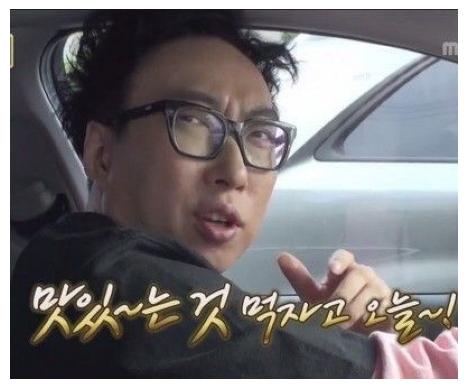

In [ ]:
pipeline('밥 먹으러 가자')

In [ ]:
iface = gr.Interface(fn=pipeline, inputs="text", outputs="image")
iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://afd94430df4f89cfad.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)



마법의 solar고동 1등할 수 있나요?


100%|██████████| 4844/4844 [00:00<00:00, 35980.23it/s]
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1477: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(



마법의솔라고동 1등하게 해주세요


100%|██████████| 4844/4844 [00:00<00:00, 30967.53it/s]



오늘 챌린지 낼 수 있을까요?


100%|██████████| 4844/4844 [00:00<00:00, 34904.68it/s]



하기 싫다


100%|██████████| 4844/4844 [00:00<00:00, 32062.46it/s]



10점


100%|██████████| 4844/4844 [00:00<00:00, 31614.88it/s]


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://afd94430df4f89cfad.gradio.live


In [ ]:
util.cos_sim(smodel.encode('누군가가 심심함을 느끼는 상황'), smodel.encode('따분함을 느끼는 중'))

tensor([[0.6404]])